In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

In [2]:
#group different towns and generate a dictionary for storing the data

def emissions(df_electri):
    df_electri.columns = df_electri.iloc[3]  # Set the specified row as column names
    df_electri = df_electri.iloc[4:]
    df_electri = df_electri.reset_index(drop=True)
    df_electri = df_electri.apply(pd.to_numeric, errors='ignore')
    df_electri = df_electri.dropna(axis=1, how="all")#drop column that only has "NaN" 
    df_electri.insert(1,'County Name',df_town["County Name"])
    resi_elec_sum=df_electri["Residential Electric Usage ( kWh)"].sum()
    resi_natur_sum=df_electri["Residential Natural Gas Usage (ccf)"].sum()
    com_elec_sum=df_electri["Commercial Electric Usage ( kWh)"].sum()
    com_natur_sum=df_electri[" Commercial Natural Gas Usage (ccf)"].sum()
    grouped = df_electri.groupby('County Name')
    grouped_dataframes = {}
    for group_name, group_df in grouped:
        grouped_dataframes[group_name] = group_df
    
    summ=[]

    # Define a function to perform the operation on a DataFrame.
    def resi_elec(df):
        # Replace this with your desired operation on df.
        return df['Residential Electric Usage ( kWh)'].sum()
    def resi_natur(df):
        # Replace this with your desired operation on df.
        return df['Residential Natural Gas Usage (ccf)'].sum()
    def com_elec(df):
        # Replace this with your desired operation on df.
        return df['Commercial Electric Usage ( kWh)'].sum()
    def com_natur(df):
        # Replace this with your desired operation on df.
        return df[' Commercial Natural Gas Usage (ccf)'].sum()

    # Create a dictionary to store the results of the operation for each group.
    resi_elec_results = {}
    resi_natur_results = {}
    com_elec_results = {}
    com_natur_results = {}


    # Iterate through the grouped DataFrames and apply the operation.
    for group_name, group_df in grouped_dataframes.items():
        resi_elec_results[group_name] = resi_elec(group_df)
        resi_natur_results[group_name] = resi_natur(group_df)
        com_elec_results[group_name] = com_elec(group_df)
        com_natur_results[group_name] = com_natur(group_df)


    dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
    
    def find_hartford(dictionary):
        if 'Hartford' in dictionary:
            return dictionary['Hartford']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        hartford_value = find_hartford(dictionary)
    

    def find_Fairfield(dictionary):
        if 'Fairfield' in dictionary:
            return dictionary['Fairfield']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        Fairfield_value = find_Fairfield(dictionary)
        
    # Define a function to search for 'Hartford' in a dictionary
    dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
    def find_Middlesex(dictionary):
        if 'Middlesex' in dictionary:
            return dictionary['Middlesex']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        Middlesex_value = find_Middlesex(dictionary)
       
   
    def find_New_Haven(dictionary):
        if 'New Haven' in dictionary:
            return dictionary['New Haven']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        New_Haven_value = find_New_Haven(dictionary)
      

    # Define a function to search for 'Hartford' in a dictionary
    dictionaries=[resi_elec_results,resi_natur_results,com_elec_results,com_natur_results]
    def find_Tolland(dictionary):
        if 'Tolland' in dictionary:
            return dictionary['Tolland']
        else:
            return None

    # Iterate through the list of dictionaries and search for 'Hartford'
    for i, dictionary in enumerate(dictionaries, start=1):
        Tolland_value = find_Tolland(dictionary)
        
    df = pd.DataFrame(dictionaries)
    #name =['Residential Electric Usage ( kWh)','Residential Natural Gas Usage (ccf)','Commercial Electric Usage ( kWh)','Commercial Natural Gas Usage (ccf)']
    #df.insert(0, 'Utility Consumption', name)
    df['Total']=df["Fairfield"]+df["Hartford"]+df["Litchfield"]+df["Middlesex"]+df["New Haven"]+df["New London"]+df["Tolland"]+df["Windham"]
    HEM = df['Middlesex']+df['New Haven']+df['Tolland']
    NHM = df['New Haven']
    BSN = df['Fairfield']
    df_msa = pd.DataFrame({NHM.name: NHM, HEM.name: HEM, BSN.name: BSN})
    df_msa["Statewide"]=df['Total']
    name =['Residential Electric Usage ( kWh)','Residential Natural Gas Usage (ccf)','Commercial Electric Usage ( kWh)','Commercial Natural Gas Usage (ccf)']
    df_msa.insert(0, 'Utility Consumption', name)
    
    # New column index
    new_columns = ['Utility Consumption', 'New Haven-Milford (NHM)', 'Hartford-East Hartford-Middletown (HEM)','Bridgeport-Stamford-Norwalk (BSN)','Statewide']

    # Assign new column names directly to the .columns attribute
    df_msa.columns = new_columns
    selected_data = df_msa.iloc[[0, 2]]
    sum_result = selected_data.iloc[0,1:]+selected_data.iloc[1,1:]
    # Convert sum_result Series to DataFrame and concatenate it with selected_data
    sum_result_df = pd.DataFrame([sum_result.values], columns=sum_result.index)

    msa_result = pd.concat([selected_data, sum_result_df], ignore_index=True)
    msa_result.at[2, 'Utility Consumption'] = 'Total'
    #rows=['Residential Electric Usage (kWh)','Commercial/Industrial Electric Usage (kWh)','Total (kWh)']
    #msa_result.insert(0, 'Utility Consumption', rows)
    Total_EF = 543.852

    ghg_NHM = msa_result['New Haven-Milford (NHM)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
    ghg_HEM = msa_result['Hartford-East Hartford-Middletown (HEM)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
    ghg_BSN = msa_result['Bridgeport-Stamford-Norwalk (BSN)']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
    ghg_Statewide = msa_result['Statewide']/1000*Total_EF/2204.62/1000000 #unit (MMTCO2e)
    
    msa_result['GHG Emissions_NHM (MMTCO2e)'] = ghg_NHM
    msa_result['GHG Emissions_HEM (MMTCO2e)'] = ghg_HEM
    msa_result['GHG Emissions_BSN (MMTCO2e)'] = ghg_BSN
    msa_result['GHG Emissions_Statewide (MMTCO2e)'] = ghg_Statewide
    return msa_result

In [3]:
data_dir = '../../../data/raw/'

df_town = pd.read_csv(os.path.join(data_dir, 'Town_name_MSA.csv'))

# List all CSV files in the directory
csv_files = [file for file in os.listdir(data_dir) if file.endswith('.csv') and 'Report - Exported on' in file]


# Create an empty dictionary to store DataFrames
dataframes = {}

# Loop through the CSV files
for csv_file in csv_files:
    # Extract the year from the file name
    year = csv_file.split(' ')[0]
    
    # Read the CSV file into a DataFrame
    file_path = os.path.join(data_dir, csv_file)
    dataframes[year] = pd.read_csv(file_path)

In [4]:
# List of years for which you want to calculate emissions data
years_to_process = ['2022', '2021', '2020', '2019', '2018', '2017', '2016']
df_electri_2022 = dataframes.get('2022')
df_electri_2022

,2022 Residential and Commercial Aggregate Energy Usage by Town,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Households include all residential electric an...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Town Name,NaN,Residential Electric Usage ( kWh),Residential Natural Gas Usage (ccf),Commercial Electric Usage ( kWh),Commercial Natural Gas Usage (ccf)
4,Andover,NaN,12215069,1782,2203788,0
...,...,...,...,...,...,...
168,Windsor Locks,NaN,37378954,1443070,81920233,35940756
169,Wolcott,NaN,61616616,196911,19057133,531581
170,Woodbridge,NaN,34726395,193507,17066975,2217454
171,Woodbury,NaN,48243245,54273,13172034,353249


In [29]:
def get_emissions_data(years):
    # Create an empty dictionary to store emissions data for each year
    emissions_data = {}

    # Iterate over the years and load data for each year
    for year in years:
        #file_name = f'{year Report - Exported on 10-04-2023}.csv'  # Assuming your data files are named like '2022.csv', '2021.csv', etc.
        #file_path = os.path.join(data_dir, file_name)
        df = dataframes.get(year)

        # Calculate emissions data for the current year and store it in the dictionary
        emissions_data[year] = emissions(df)

    return emissions_data

# Call the function to get emissions data for all years
my_dict = get_emissions_data(years_to_process)
my_dict['2016']

,Utility Consumption,New Haven-Milford (NHM),Hartford-East Hartford-Middletown (HEM),Bridgeport-Stamford-Norwalk (BSN),Statewide,GHG Emissions_NHM (MMTCO2e),GHG Emissions_HEM (MMTCO2e),GHG Emissions_BSN (MMTCO2e),GHG Emissions_Statewide (MMTCO2e)
0,Residential Electric Usage ( kWh),2548765679,3633243679,3426481392,11553316730,0.628748,0.896275,0.845270,2.850058
1,Commercial Electric Usage ( kWh),3248341473,4166495121,3838370070,14443298559,0.801325,1.027822,0.946878,3.562980
2,Total,5797107152,7799738800,7264851462,25996615289,1.430073,1.924097,1.792147,6.413038


In [33]:
modified_data_dict = {}

# Number of columns to extract
num_columns_to_extract = 4

# Iterate over each key-value pair in the dictionary
for key, dataframe in my_dict.items():
    # Select the first few columns
    modified_dataframe = dataframe.iloc[:, :num_columns_to_extract]
    
    # Store the modified dataframe in the new dictionary
    modified_data_dict[key] = modified_dataframe
    
modified_data_dict['2016']

,Utility Consumption,New Haven-Milford (NHM),Hartford-East Hartford-Middletown (HEM),Bridgeport-Stamford-Norwalk (BSN)
0,Residential Electric Usage ( kWh),2548765679,3633243679,3426481392
1,Commercial Electric Usage ( kWh),3248341473,4166495121,3838370070
2,Total,5797107152,7799738800,7264851462


In [42]:
#extract all the residential consumption data
# Initialize an empty list to store the first rows from each dataframe
first_rows = []

# Iterate over each key-value pair in the modified data dictionary
for key, dataframe in modified_data_dict.items():
    # Extract the first row of the dataframe
    first_row = dataframe.iloc[0]
    
    # Assign the name of the dataframe as the index name of the first row
    first_row.name = key
    
    # Append the first row to the list
    first_rows.append(first_row)

# Concatenate the list of first rows into a new dataframe
residential_consumption = pd.concat(first_rows, axis=1)

# Transpose the dataframe if needed
residential_consumption = residential_consumption.T
residential_consumption.to_csv('../../../data/tidy/residential-electricity-2016to2022.csv')

In [43]:
#extract the industrial/commercial electricity consumption data
second_rows = []

# Iterate over each key-value pair in the modified data dictionary
for key, dataframe in modified_data_dict.items():
    # Extract the first row of the dataframe
    second_row = dataframe.iloc[1]
    
    # Assign the name of the dataframe as the index name of the first row
    second_row.name = key
    
    # Append the first row to the list
    second_rows.append(second_row)

# Concatenate the list of first rows into a new dataframe
commercial_consumption = pd.concat(second_rows, axis=1)

# Transpose the dataframe if needed
commercial_consumption = commercial_consumption.T
commercial_consumption.to_csv('../../../data/tidy/commercial-electricity-2016to2022.csv')

In [6]:
# Extract years and data from the dictionary
years = list(my_dict.keys())
value = list(my_dict.values())

data =value
data1 =value
data2 =value

emissions_data={}
    
for i in range(0,7):
    # Extract columns 'Name' and 'Age' from row 0 (first row)
    row_index = 2
    selected_columns = ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)', 'GHG Emissions_BSN (MMTCO2e)']
    result = data[i].loc[row_index, selected_columns]
    emissions_data[years[i]] = result

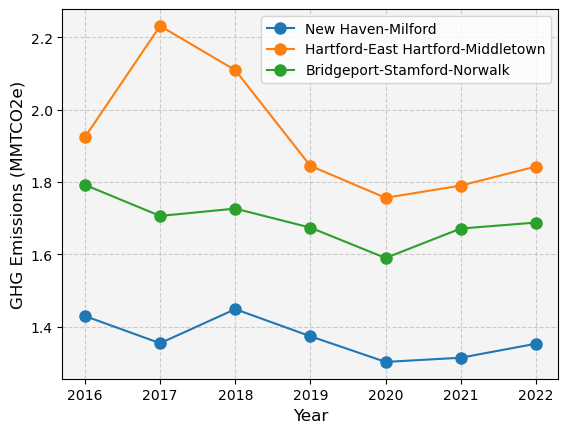

In [7]:
# Define a custom color palette
custom_colors = ['#FF5733', '#FFC300', '#3366FF', '#33FF57', '#900C3F']

# Extract keys (0 to 5) and corresponding data
keys = list(emissions_data.keys())[::-1]
data = [emissions_data[key] for key in keys]

# Extract column names for the legend
column_names = list(data[0].keys())

# Apply custom colors to the lines
#plt.grid(True, linestyle='--', alpha=0.6)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the background color
plt.gca().set_facecolor('#F4F4F4')

# Add labels and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('GHG Emissions (MMTCO2e)', fontsize=12)

legend_labels = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
# Create a multiple line plot with custom legend labels
for i, column_name in enumerate(column_names):
    plt.plot(keys, [item[column_name] for item in data], label=legend_labels[i], linestyle='-', marker='o', markersize=8)

# Customize the legend labels
plt.legend(fontsize=10)

# Save the plot
plt.savefig('../../../figures/historical-total-electricity-emissions.png', dpi=600, bbox_inches='tight')

In [8]:
sector_emissions_data={}
    
for i in range(0,7):
    # Extract columns 'Name' and 'Age' from row 0 (first row)
    row_index = 0
    selected_columns = ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)', 'GHG Emissions_BSN (MMTCO2e)']
    result = data1[i].loc[row_index, selected_columns]
    sector_emissions_data[years[i]] = result

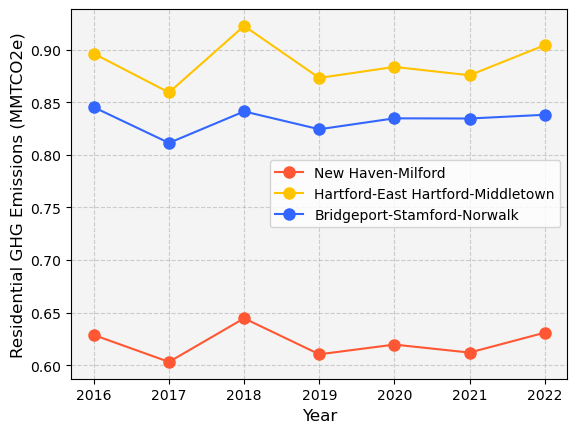

In [9]:
# Define a custom color palette with distinct colors for each line
custom_colors = ['#FF5733', '#FFC300', '#3366FF', '#33FF57', '#900C3F']

# Extract keys (0 to 5) and corresponding data
keys = list(sector_emissions_data.keys())[::-1]
data = [sector_emissions_data[key] for key in keys]

# Extract column names for the legend
column_names = list(data[0].keys())

# Apply custom colors to the lines
# Create a multiple line plot with custom legend labels
for i, column_name in enumerate(column_names):
    plt.plot(keys, [item[column_name] for item in data], label=legend_labels[i], color=custom_colors[i], linestyle='-', marker='o', markersize=8)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the background color
plt.gca().set_facecolor('#F4F4F4')

# Add labels and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Residential GHG Emissions (MMTCO2e)', fontsize=12)
plt.legend(fontsize=10)

# Save the plot
plt.savefig('../../../figures/historical-residential-electricity-emissions.png', dpi=600, bbox_inches='tight')


In [10]:
df_residential = pd.DataFrame(data, index=keys)
df_residential.to_csv('../../../results/residential_emissions-electricity.csv')

In [11]:
sector_emissions_data_1={}
    
for i in range(0,7):
    # Extract columns 'Name' and 'Age' from row 0 (first row)
    row_index = 1
    selected_columns = ['GHG Emissions_NHM (MMTCO2e)', 'GHG Emissions_HEM (MMTCO2e)', 'GHG Emissions_BSN (MMTCO2e)']
    result = data2[i].loc[row_index, selected_columns]
    sector_emissions_data_1[years[i]] = result

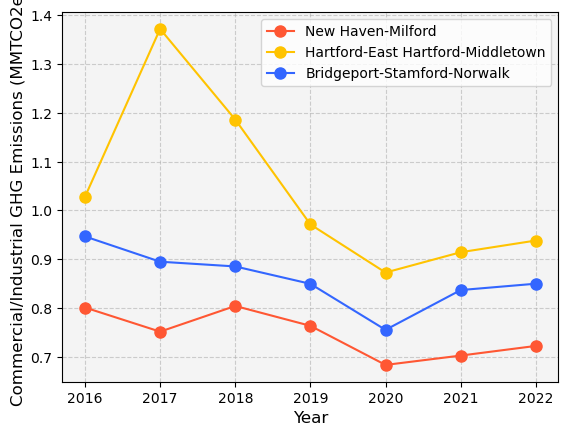

In [12]:
custom_colors = ['#FF5733', '#FFC300', '#3366FF', '#33FF57', '#900C3F']

# Extract keys (0 to 5) and corresponding data
keys = list(sector_emissions_data_1.keys())[::-1]
data = [sector_emissions_data_1[key] for key in keys]

# Extract column names for the legend
column_names = list(data[0].keys())

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the background color
plt.gca().set_facecolor('#F4F4F4')

# Add labels and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Commercial/Industrial GHG Emissions (MMTCO2e)', fontsize=12)

# Create a multiple line plot with custom legend labels and colors
for i, column_name in enumerate(column_names):
    plt.plot(keys, [item[column_name] for item in data], label=legend_labels[i], color=custom_colors[i], linestyle='-', marker='o', markersize=8)

# Customize the legend labels
legend_labels = ['New Haven-Milford', 'Hartford-East Hartford-Middletown', 'Bridgeport-Stamford-Norwalk']
plt.legend(fontsize=10)

# Save the plot
plt.savefig('../../../figures/historical-commercial-electricity-emissions.png', dpi=600, bbox_inches='tight')



In [13]:
df_indus_commercial = pd.DataFrame(data, index=keys)
df_indus_commercial.to_csv('../../../results/industrial_commercial_emissions-electricity.csv')